In [115]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib
import matplotlib.pyplot as plt
from zipfile import ZipFile

plt.rcParams['figure.figsize'] = (10, 4)

<br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 1: Acquire the Data

Here, we start by acquiring the data that this lab is based on. **Please don't worry about understanding all the code in this section**; the steps shown here are out of scope and provided here for student interest!

**1. Obtain data**<br/>
To retrieve the dataset, we will use the `ds100_utils.download_lab3_data` utility, a helper function that Data 100 staff created. You can see how this is implemented by opening the file `ds100_utils.py` on the left.

In [116]:
df = pd.read_csv('../data/Berkeley_PD_-_Calls_for_Service_2022.csv')
df

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,6:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,8:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA
2,22023993,VANDALISM,05/25/2022 12:00:00 AM,8:00:00 AM,VANDALISM,3,10/13/2022 04:42:00 PM,"2400 BLOCK 8TH ST\nBerkeley, CA\n(37.86206, -1...",2400 BLOCK 8TH ST,Berkeley,CA
3,22026547,DISTURBANCE,06/10/2022 12:00:00 AM,9:35:00 PM,DISORDERLY CONDUCT,5,10/13/2022 04:42:00 PM,"1300 BLOCK HEARST AVE\nBerkeley, CA\n(37.87133...",1300 BLOCK HEARST AVE,Berkeley,CA
4,22018126,ASSAULT/BATTERY FEL.,04/20/2022 12:00:00 AM,3:31:00 PM,ASSAULT,3,10/13/2022 04:42:00 PM,"3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.855...",3000 BLOCK SHATTUCK AVE,Berkeley,CA
...,...,...,...,...,...,...,...,...,...,...,...
4485,22035888,FRAUD/FORGERY,08/01/2022 12:00:00 AM,4:30:00 PM,FRAUD,1,10/13/2022 04:42:00 PM,"900 BLOCK ADDISON ST\nBerkeley, CA\n(37.86699,...",900 BLOCK ADDISON ST,Berkeley,CA
4486,22018846,VEHICLE STOLEN,04/24/2022 12:00:00 AM,1:00:00 AM,MOTOR VEHICLE THEFT,0,10/13/2022 04:42:00 PM,"1800 BLOCK CAPISTRANO AVE\nBerkeley, CA\n(37.8...",1800 BLOCK CAPISTRANO AVE,Berkeley,CA
4487,22043043,THEFT FROM AUTO,09/15/2022 12:00:00 AM,5:00:00 AM,LARCENY - FROM VEHICLE,4,10/13/2022 04:42:00 PM,"2300 BLOCK CURTIS ST\nBerkeley, CA\n(37.86476,...",2300 BLOCK CURTIS ST,Berkeley,CA
4488,22028745,VEHICLE STOLEN,06/22/2022 12:00:00 AM,8:00:00 PM,MOTOR VEHICLE THEFT,3,10/13/2022 04:42:00 PM,"1700 BLOCK DERBY ST\nBerkeley, CA\n(37.85929, ...",1700 BLOCK DERBY ST,Berkeley,CA


<br/>

<hr style="border: 1px solid #fdb515;" />

# Part 2: Clean and Explore the Data

Let's now load the CSV file we have into a `DataFrame`, and start exploring the data. We added a line at the top of the cell to suppress a couple of warnings related to how we use `pd.to_datetime` here, but you need not worry about that.

In [117]:
%%capture --no-stdout

df['EVENTTM'] = pd.to_datetime(df['EVENTTM']).dt.strftime('%H:%M:%S %p')

In [118]:
df.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,06:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,20:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA
2,22023993,VANDALISM,05/25/2022 12:00:00 AM,08:00:00 AM,VANDALISM,3,10/13/2022 04:42:00 PM,"2400 BLOCK 8TH ST\nBerkeley, CA\n(37.86206, -1...",2400 BLOCK 8TH ST,Berkeley,CA
3,22026547,DISTURBANCE,06/10/2022 12:00:00 AM,21:35:00 PM,DISORDERLY CONDUCT,5,10/13/2022 04:42:00 PM,"1300 BLOCK HEARST AVE\nBerkeley, CA\n(37.87133...",1300 BLOCK HEARST AVE,Berkeley,CA
4,22018126,ASSAULT/BATTERY FEL.,04/20/2022 12:00:00 AM,15:31:00 PM,ASSAULT,3,10/13/2022 04:42:00 PM,"3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.855...",3000 BLOCK SHATTUCK AVE,Berkeley,CA


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490 entries, 0 to 4489
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CASENO          4490 non-null   int64 
 1   OFFENSE         4490 non-null   object
 2   EVENTDT         4490 non-null   object
 3   EVENTTM         4490 non-null   object
 4   CVLEGEND        4490 non-null   object
 5   CVDOW           4490 non-null   int64 
 6   InDbDate        4490 non-null   object
 7   Block_Location  4490 non-null   object
 8   BLKADDR         4476 non-null   object
 9   City            4490 non-null   object
 10  State           4490 non-null   object
dtypes: int64(2), object(9)
memory usage: 386.0+ KB


In [120]:
df.describe()

,CASENO,CVDOW
count,4.490000e+03,4490.000000
mean,2.204229e+07,3.075724
std,2.222561e+04,1.976035
min,2.200110e+07,0.000000
25%,2.202749e+07,1.000000
50%,2.203642e+07,3.000000
75%,2.204490e+07,5.000000
max,2.209134e+07,6.000000


Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the `DataFrame`. However, we still need more information about what each column represents. Let's explore the data further in Question 1.

Before we go over the fields to deduce their meanings, the cell below will verify that all the events happened in Berkeley by grouping on the `City` and `State` columns. You should see that all of our data falls into one group.

In [121]:
df.groupby(["City", "State"]).size()

City      State
Berkeley  CA       4490
dtype: int64

When we called `.head()` on the `DataFrame` `calls`, it seemed like `OFFENSE` and `CVLEGEND` both contained information about the type of event reported. What is the difference in meaning between the two columns? One way to probe this is to look at the `value_counts` for each `Series`.

In [122]:
df['OFFENSE'].value_counts().head(10)

OFFENSE
THEFT MISD. (UNDER $950)    660
THEFT FELONY (OVER $950)    454
BURGLARY AUTO               446
DISTURBANCE                 437
VEHICLE STOLEN              332
THEFT FROM AUTO             294
VANDALISM                   264
ASSAULT/BATTERY MISD.       249
BURGLARY RESIDENTIAL        244
BURGLARY COMMERCIAL         174
Name: count, dtype: int64

In [123]:
df['CVLEGEND'].value_counts().head(10)

CVLEGEND
LARCENY                   1127
BURGLARY - VEHICLE         446
DISORDERLY CONDUCT         437
ASSAULT                    344
MOTOR VEHICLE THEFT        332
LARCENY - FROM VEHICLE     294
VANDALISM                  264
BURGLARY - RESIDENTIAL     244
FRAUD                      209
BURGLARY - COMMERCIAL      174
Name: count, dtype: int64

It seems like `OFFENSE` is more specific than `CVLEGEND`, e.g., "LARCENY" vs. "THEFT FELONY (OVER $950)". If you're unfamiliar with the term, "larceny" is a legal term for theft of personal property.

To get a sense of how many sub-categories there are for each `OFFENSE`, we will set `calls_by_cvlegend_and_offense` equal to a multi-indexed `Series` where the data is first indexed on the `CVLEGEND` and then on the `OFFENSE`, and the data is equal to the number of offenses in the database that match the respective `CVLEGEND` and `OFFENSE`. As you can see, `calls_by_cvlegend_and_offense["LARCENY", "THEFT FROM PERSON"]` returns `13` which means there are 13 instances of larceny with offense of type "THEFT FROM PERSON" in the database.

In [124]:
cv_offense = df.groupby(['CVLEGEND', 'OFFENSE']).size().reset_index()
cv_offense

,CVLEGEND,OFFENSE,0
0,ALL OTHER OFFENSES,MUNICIPAL CODE,1
1,ARSON,ARSON,19
2,ASSAULT,ASSAULT/BATTERY FEL.,95
3,ASSAULT,ASSAULT/BATTERY MISD.,249
4,BURGLARY - COMMERCIAL,BURGLARY COMMERCIAL,174
5,BURGLARY - RESIDENTIAL,BURGLARY RESIDENTIAL,244
6,BURGLARY - VEHICLE,BURGLARY AUTO,446
7,DISORDERLY CONDUCT,DISTURBANCE,437
8,DRUG VIOLATION,NARCOTICS,106
9,FAMILY OFFENSE,DOMESTIC VIOLENCE,99


<br>

---

## Question 1

In the cell below, set `answer1` equal to a `list` of strings corresponding to the possible values for `OFFENSE` when `CVLEGEND` is "LARCENY". You can type the answer manually, or you can create an expression that automatically extracts the names.


In [125]:
cv_offense[cv_offense['CVLEGEND'] == 'LARCENY']

,CVLEGEND,OFFENSE,0
14,LARCENY,THEFT FELONY (OVER $950),454
15,LARCENY,THEFT FROM PERSON,13
16,LARCENY,THEFT MISD. (UNDER $950),660


<br/>

<hr style="border: 1px solid #fdb515;" />

# Part 3: Visualize the Data


### `Matplotlib` demo

You've seen some `matplotlib` in this class already (in homework 1), but now we will explain how to work with the object-oriented plotting API mentioned in this [matplotlib.pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html). In `matplotlib`, plotting occurs on a set of `Axes` that are associated with a `Figure`. An analogy is that on a blank canvas (`Figure`), you choose a location to plot (`Axes`) and then fill it in (plot).

There are two approaches to labeling and manipulating figure contents, which we'll discuss below. Approach 1 is closest to the plotting paradigm of MATLAB, the namesake of `matplotlib`; Approach 2 is also common because many `matplotlib`-based packages (such as `seaborn`) explicitly return the current set of axes after plotting data. Both are essentially equivalent, and at the end of this class, you'll be comfortable with both. 

**Approach 1**: `matplotlib` will auto-plot onto the current set of `Axes` or (if none exists) create a new figure/set of default axes. You can plot data using methods from `plt`, which is shorthand for the `matplotlib.pyplot` package. Then subsequent `plt` calls all edit the same set of default-created axes.

**Approach 2**:  
After creating the initial plot, you can also use `plt.gca()` to explicitly get the current set of axes and then edit those specific axes using axes methods. Note the method naming is slightly different!

`pandas` also offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method, which uses `matplotlib` under the hood. For now, we'll focus on `matplotlib` itself so you get used to the syntax, but just know that convenient `pandas` plotting methods exist for your own future data science exploration.

Below, we show both approaches by generating a horizontal bar plot to visually display the value counts for `CVLEGEND`. See the `barh` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html?highlight=barh#matplotlib.pyplot.barh) for more details.

Demo 2: Using axes methods to update plot


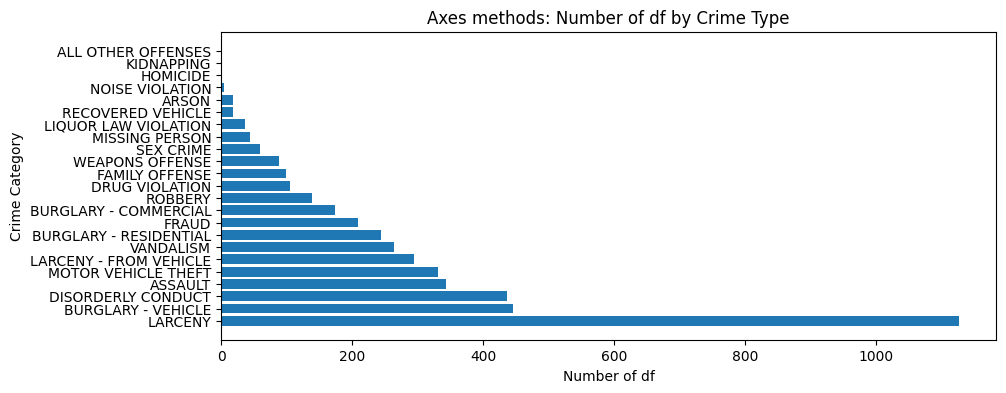

In [126]:
demo = 2
df_cvlegend = df['CVLEGEND'].value_counts()

if demo == 1:
    plt.barh(df_cvlegend.index, df_cvlegend) # Creates figure and axes
    print(f"Demo {demo}: Using plt methods to update plot")
    plt.ylabel("Crime Category")               # Uses most recently plotted axes
    plt.xlabel("Number of df")
    plt.title("Number of df by Crime Type")
elif demo == 2:
    print(f"Demo {demo}: Using axes methods to update plot")
    plt.barh(df_cvlegend.index, df_cvlegend) # Creates figure and axes
    ax = plt.gca()
    ax.set_ylabel("Crime Category")
    ax.set_xlabel("Number of df")
    ax.set_title("Axes methods: Number of df by Crime Type")
else:
    print("Error: Please assign the demo variable to 1 or 2.")

plt.show()

<br>

---

## Question 2

Now it is your turn to make a plot using `matplotlib`. Let's start by transforming the data so that it is easier to work with.

The `CVDOW` field isn't named helpfully, and it is hard to see the meaning from the data alone. According to the website [linked](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5) at the top of this notebook, `CVDOW` is actually indicating the day that events happened. 0->Sunday, 1->Monday ... 6->Saturday. 

### Question 2a

Add a new column `Day` to `calls` that has the string weekday (e.g., "Sunday") for the corresponding value in CVDOW. For example, if the first 3 values of `CVDOW` are `[3, 6, 0]`, then the first 3 values of the `Day` column should be `["Wednesday", "Saturday", "Sunday"]`.

**Hint:** Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function on `calls["CVDOW"]`. Can you assign this to the new column `calls["Day"]`?

In [127]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_indices = range(0, 6)
indices_to_days_dict = dict(zip(day_indices, days)) 

df["Day"] = df["CVDOW"].map(indices_to_days_dict)
df

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Day
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,06:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,Wednesday
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,20:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA,Thursday
2,22023993,VANDALISM,05/25/2022 12:00:00 AM,08:00:00 AM,VANDALISM,3,10/13/2022 04:42:00 PM,"2400 BLOCK 8TH ST\nBerkeley, CA\n(37.86206, -1...",2400 BLOCK 8TH ST,Berkeley,CA,Wednesday
3,22026547,DISTURBANCE,06/10/2022 12:00:00 AM,21:35:00 PM,DISORDERLY CONDUCT,5,10/13/2022 04:42:00 PM,"1300 BLOCK HEARST AVE\nBerkeley, CA\n(37.87133...",1300 BLOCK HEARST AVE,Berkeley,CA,Friday
4,22018126,ASSAULT/BATTERY FEL.,04/20/2022 12:00:00 AM,15:31:00 PM,ASSAULT,3,10/13/2022 04:42:00 PM,"3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.855...",3000 BLOCK SHATTUCK AVE,Berkeley,CA,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
4485,22035888,FRAUD/FORGERY,08/01/2022 12:00:00 AM,16:30:00 PM,FRAUD,1,10/13/2022 04:42:00 PM,"900 BLOCK ADDISON ST\nBerkeley, CA\n(37.86699,...",900 BLOCK ADDISON ST,Berkeley,CA,Monday
4486,22018846,VEHICLE STOLEN,04/24/2022 12:00:00 AM,01:00:00 AM,MOTOR VEHICLE THEFT,0,10/13/2022 04:42:00 PM,"1800 BLOCK CAPISTRANO AVE\nBerkeley, CA\n(37.8...",1800 BLOCK CAPISTRANO AVE,Berkeley,CA,Sunday
4487,22043043,THEFT FROM AUTO,09/15/2022 12:00:00 AM,05:00:00 AM,LARCENY - FROM VEHICLE,4,10/13/2022 04:42:00 PM,"2300 BLOCK CURTIS ST\nBerkeley, CA\n(37.86476,...",2300 BLOCK CURTIS ST,Berkeley,CA,Thursday
4488,22028745,VEHICLE STOLEN,06/22/2022 12:00:00 AM,20:00:00 PM,MOTOR VEHICLE THEFT,3,10/13/2022 04:42:00 PM,"1700 BLOCK DERBY ST\nBerkeley, CA\n(37.85929, ...",1700 BLOCK DERBY ST,Berkeley,CA,Wednesday


<br>

---
### Question 2b

Now let's look at the `EVENTTM` column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` `DataFrame`. **You should save the hour as an `int`**. The format of the `'EVENTTM'` column and some of the associated reasoning about the answer in the lab walkthrough is slightly different. However, the answer shown in the walkthrough is still applicable to the question below. 

**Hint:** Your code should only require one line. <br/>

In [141]:
df["Hour"] = df['EVENTTM'].str.split(':').str[0]
df.reset_index(drop=True, inplace=True)
df.head(2)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Day,Hour
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,06:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,Wednesday,06
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,20:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA,Thursday,20


<br>

---
### Question 2c

Using `matplotlib`, construct a line plot with the count of the number of calls (entries in the table) for each hour of the day  **ordered by the time** (e.g., `12:00 AM`, `1:00 AM`, ...). Be sure that your axes are labeled and that your plot is titled. The solution shown in the lab walkthrough is not the only way to answer this question, an alternative approach could involve using `.sort_index()`.

**Hint 1**: Check out the `plt.plot` method in the `matplotlib` [tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#intro-to-pyplot), as well as our demo above.

To better understand the time of day a report occurs, we could **stratify the analysis by the day of the week.** To do this we will use **violin plots** (a variation of a **box plot**).

A violin plot shows an estimated distribution of quantitative data (e.g., distribution of calls by hour) over a categorical variable (day of the week). More calls occur in hours corresponding to the fatter part of each violin; the median hour of all calls in a particular day is marked by the white dot in the corresponding violin.

C:\Users\kalul\AppData\Local\Temp\ipykernel_4076\411125639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df.sort_values("CVDOW"),


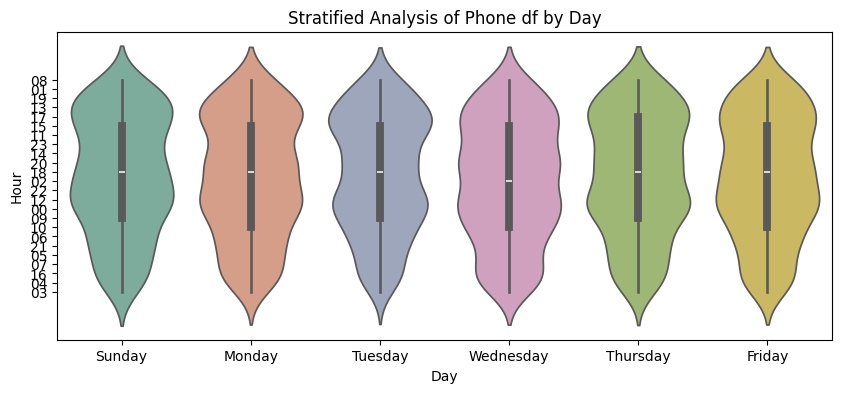

In [142]:
import seaborn as sns
ax = sns.violinplot(data=df.sort_values("CVDOW"),
                    x="Day", y="Hour",
                    saturation=0.5, palette="Set2",
                  )
ax.set_title("Stratified Analysis of Phone df by Day");

<br/>

<hr style="border: 1px solid #fdb515;" />

# Part 4: Data Faithfulness vs. Reality
<br>

## Question 3
In this last part of the lab, let's extract the GPS coordinates (latitude, longitude) from the `Block_Location` of each record.

In [130]:
df.loc[4, 'Block_Location']

'3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.85507, -122.26677)'

### Question 3a: Regular Expressions

Use regular expressions to create a new `DataFrame` `calls_lat_lon` that has two columns titled `Lat` and `Lon`, containing the respective latitude and longitude of each record in `calls`. You should use the `Block_Location` column to extract the latitude and longitude coordinates.

**Hint**: Check out the `Series.str.extract` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html?highlight=extract#pandas.Series.str.extract).

In [154]:
pattern_to_extract = r'\(([-+]?\d+\.\d+), ([-+]?\d+\.\d+)\)'

lat_long = pd.DataFrame(columns=['CASENO', 'Latitude', 'Longitude'])

lat_long[['Latitude', 'Longitude']] = df['Block_Location'].str.extract(pattern_to_extract)
lat_long['CASENO'] = df['CASENO']
lat_long

,CASENO,Latitude,Longitude
0,22036516,37.86988,-122.27054
1,22027674,37.87674,-122.26665
2,22023993,37.86206,-122.29346
3,22026547,37.87133,-122.28656
4,22018126,37.85507,-122.26677
...,...,...,...
4485,22035888,37.86699,-122.2958
4486,22018846,37.89377,-122.28098
4487,22043043,37.86476,-122.28858
4488,22028745,37.85929,-122.27563


<br>

---

### Question 3b: Join Tables

Let's include the GPS data into our `calls` data. In the below cell, use `calls_lat_lon` to add two new columns called `Lat` and `Lon` to `calls`.

**Hint 1**: Note that the order of records in `calls` and `calls_lat_lon` are the same. 

**Hint 2**: Another way to achieve our goal could be using `pd.merge`, look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) to see how we can merge using the `left_index` and `right_index` arguments.

In [157]:
df = df.merge(lat_long, on='CASENO')
df.head(2)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Day,Hour,Latitude_x,Longitude_x,Latitude_y,Longitude_y
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,06:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,Wednesday,06,37.86988,-122.27054,37.86988,-122.27054
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,20:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA,Thursday,20,37.87674,-122.26665,37.87674,-122.26665


<br>

---
### Question 3c: Check for Invalid Values

It seems like every record has valid GPS coordinates. That is, there are no `NaN` values in either column as we can verify below

In [161]:
(~df[["Latitude_x", "Longitude_y"]].isna()).mean()

Latitude_x     1.0
Longitude_y    1.0
dtype: float64

However, a closer examination of the data reveals something else. Here's the first few records of `calls` again:

In [162]:
df.head(5)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Day,Hour,Latitude_x,Longitude_x,Latitude_y,Longitude_y
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,06:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,Wednesday,06,37.86988,-122.27054,37.86988,-122.27054
1,22027674,BURGLARY RESIDENTIAL,06/16/2022 12:00:00 AM,20:25:00 PM,BURGLARY - RESIDENTIAL,4,10/13/2022 04:42:00 PM,"1700 BLOCK OXFORD ST\nBerkeley, CA\n(37.87674,...",1700 BLOCK OXFORD ST,Berkeley,CA,Thursday,20,37.87674,-122.26665,37.87674,-122.26665
2,22023993,VANDALISM,05/25/2022 12:00:00 AM,08:00:00 AM,VANDALISM,3,10/13/2022 04:42:00 PM,"2400 BLOCK 8TH ST\nBerkeley, CA\n(37.86206, -1...",2400 BLOCK 8TH ST,Berkeley,CA,Wednesday,08,37.86206,-122.29346,37.86206,-122.29346
3,22026547,DISTURBANCE,06/10/2022 12:00:00 AM,21:35:00 PM,DISORDERLY CONDUCT,5,10/13/2022 04:42:00 PM,"1300 BLOCK HEARST AVE\nBerkeley, CA\n(37.87133...",1300 BLOCK HEARST AVE,Berkeley,CA,Friday,21,37.87133,-122.28656,37.87133,-122.28656
4,22018126,ASSAULT/BATTERY FEL.,04/20/2022 12:00:00 AM,15:31:00 PM,ASSAULT,3,10/13/2022 04:42:00 PM,"3000 BLOCK SHATTUCK AVE\nBerkeley, CA\n(37.855...",3000 BLOCK SHATTUCK AVE,Berkeley,CA,Wednesday,15,37.85507,-122.26677,37.85507,-122.26677


There is another field that tells us whether we have a valid `Block_Location` entry per record - i.e., with GPS coordinates (latitude, longitude) that match the listed block location. What is it?

In the below cell, use the field you found to create a new `DataFrame`, `invalid_block_loc`, that contains only the rows of `calls` that have invalid `Block_Location`. Your new `DataFrame` should have all the same columns of `calls`.

In [164]:
invalid_block_loc = df[df['BLKADDR'].isna()]
invalid_block_loc.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Day,Hour,Latitude_x,Longitude_x,Latitude_y,Longitude_y
0,22036516,THEFT FROM AUTO,08/10/2022 12:00:00 AM,06:10:00 AM,LARCENY - FROM VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,Wednesday,06,37.86988,-122.27054,37.86988,-122.27054
574,22091101,THEFT FELONY (OVER $950),09/04/2022 12:00:00 AM,11:55:00 AM,LARCENY,0,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,Sunday,11,37.86988,-122.27054,37.86988,-122.27054
703,22091162,BURGLARY AUTO,08/29/2022 12:00:00 AM,10:15:00 AM,BURGLARY - VEHICLE,1,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,Monday,10,37.86988,-122.27054,37.86988,-122.27054
1135,22090479,BURGLARY AUTO,04/20/2022 12:00:00 AM,01:00:00 AM,BURGLARY - VEHICLE,3,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,Wednesday,01,37.86988,-122.27054,37.86988,-122.27054
1314,22045306,THEFT FELONY (OVER $950),09/27/2022 12:00:00 AM,02:10:00 AM,LARCENY,2,10/13/2022 04:42:00 PM,"Berkeley, CA\n(37.86988, -122.27054)",NaN,Berkeley,CA,Tuesday,02,37.86988,-122.27054,37.86988,-122.27054


<br>

---
### Question 3d: Patterns in Invalid Values

Now let's explore if there is a pattern to which types of records have invalid block locations.

We've implemented the plotting code for you below, but read through it and verify you understand what we're doing (we've thrown in a bonus `plt.subplots()` call, documentation [here](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html#stacking-subplots-in-one-direction)).

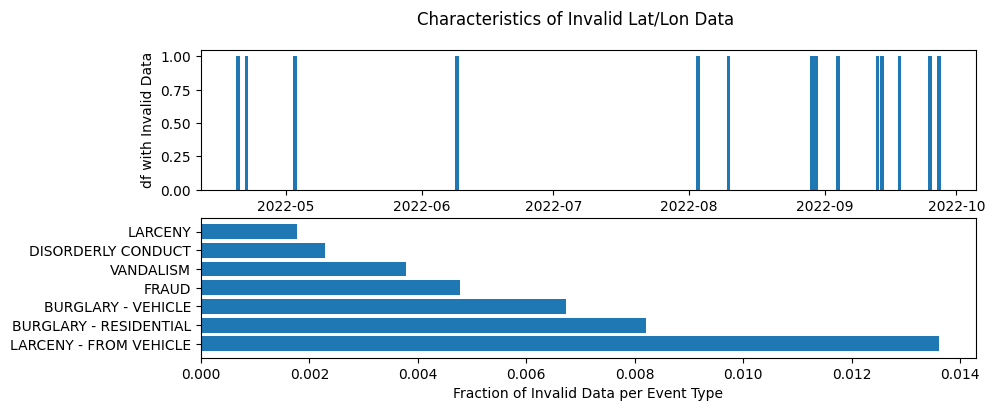

In [166]:
# Run this cell to generate the plot, no further action is needed
missing_by_time = (pd.to_datetime(invalid_block_loc['EVENTDT'], format='%m/%d/%Y %I:%M:%S %p')
                   .value_counts()
                   .sort_index()
                  )
missing_by_crime = (invalid_block_loc['CVLEGEND']
                    .value_counts() 
                    / df['CVLEGEND'].value_counts()
                   ).dropna().sort_values(ascending=False)

fig, ax = plt.subplots(2)
ax[0].bar(missing_by_time.index, missing_by_time)
ax[0].set_ylabel("df with Invalid Data")
ax[1].barh(missing_by_crime.index, missing_by_crime)
ax[1].set_xlabel("Fraction of Invalid Data per Event Type")
fig.suptitle("Characteristics of Invalid Lat/Lon Data")
plt.show()

<br>

---
### Question 3e: Explore

The below cell plots a map of phone calls by GPS coordinates (latitude, longitude); we drop invalid location data.

In [171]:
import folium
import folium.plugins

SF_COORDINATES = (37.87, -122.28)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
locs = df.drop(invalid_block_loc.index)[['Latitude_x', 'Longitude_x']].astype('float').values
heatmap = folium.plugins.HeatMap(locs.tolist(), radius=10)
sf_map.add_child(heatmap)

Based on the above map, what could be some **drawbacks** of using the location fields in this dataset to draw conclusions about crime in Berkeley? This is an open-ended question. Here are some sub-questions to consider:
* Is campus really the safest place to be?
* Why are all the calls located at street intersections, outdoors, and not within buildings?